In [1]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
ferti=pd.read_csv("FertilizerPrediction.csv",encoding ='latin1')
ferti.head(1)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea


In [3]:
import random
lst=[]
for i in range(101):
    n=random.randint(2,11)
    lst.append(n)

In [4]:
df1=pd.DataFrame(lst,columns=['ph-value'])

In [5]:
new_df=ferti.join(df1)
new_df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,ph-value
0,26,52,38,Sandy,Maize,37,0,0,Urea,2
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,2
2,34,65,62,Black,Cotton,7,9,30,14-35-14,6
3,32,62,34,Red,Tobacco,22,0,20,28-28,6
4,28,54,46,Clayey,Paddy,35,0,0,Urea,6
...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28,10
95,30,60,27,Red,Tobacco,4,17,17,10-26-26,2
96,38,72,51,Loamy,Wheat,39,0,0,Urea,5
97,36,60,43,Sandy,Millets,15,0,41,DAP,10


In [6]:
df=new_df[['Moisture','ph-value','Nitrogen','Potassium','Phosphorous']]
df

,Moisture,ph-value,Nitrogen,Potassium,Phosphorous
0,38,2,37,0,0
1,45,2,12,0,36
2,62,6,7,9,30
3,34,6,22,0,20
4,46,6,35,0,0
...,...,...,...,...,...
94,32,10,24,0,19
95,27,2,4,17,17
96,51,5,39,0,0
97,43,10,15,0,41


In [7]:
df.to_csv("MoisturePHdataset.csv")

In [8]:
df.to_csv("MoisturePHdataset.csv")

In [9]:
x[0]

array([38,  2], dtype=int64)

In [10]:
y[0]

array([37], dtype=int64)

In [11]:
y1[0]

array([0], dtype=int64)

In [12]:
y2[1]

array([36], dtype=int64)

In [13]:
y=y.astype('int')
y1=y1.astype('int')
y2=y2.astype('int')

In [14]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)
ada1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)
ada2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)

In [15]:
ada.fit(x, y)
ada1.fit(x, y1)
ada2.fit(x, y2)

C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   n_estimators=150)

In [16]:
import pickle
with open('model_nitrogen_moisture_ph_ada.sav','wb') as f:
    pickle.dump(ada,f)

In [17]:
import pickle
with open('model_Potassium_moisture_ph_ada.sav','wb') as f:
    pickle.dump(ada1,f)

In [18]:
import pickle
with open('model_Phosphorous_moisture_ph_ada.sav','wb') as f:
    pickle.dump(ada2,f)

In [20]:
import pandas as pd
dict = {'Moisture':float(input("Enter Moisture:")),
        'Ph value':float(input("Enter Ph-Value:"))}
dff=pd.DataFrame(dict,index=[0])

Enter Moisture:35
Enter Ph-Value:8


In [21]:
dff

,Moisture,Ph value
0,35.0,8.0


In [22]:
with open('model_nitrogen_moisture_ph_ada.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict(dff)
nitrogen=led[0]
print("Nitrogen is ",nitrogen)
import pickle
with open('model_Potassium_moisture_ph_ada.sav','rb') as f:
    ss=pickle.load(f)
d=ss.predict(dff)
potassium=d[0]
print("Potassium is",potassium)
with open('model_Phosphorous_moisture_ph_ada.sav','rb') as f:
    st=pickle.load(f)
ed=st.predict(dff)
phosphorous=ed[0]
print("Phosphorous is",phosphorous)

C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Nitrogen is  14
Potassium is 0
Phosphorous is 13


C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [23]:
import pandas as pd
croptobe=pd.read_csv("Crop_recommendation.csv",encoding ='latin1')
from sklearn import preprocessing
import numpy as np
croptobe.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
le = preprocessing.LabelEncoder()
croptobe['label']=le.fit_transform(croptobe['label'])

In [25]:
import random
lst=[]
for i in range(2201):
    n = random.randint(25,65)
    lst.append(n)
dff=pd.DataFrame(lst,columns=['Moisture'])

In [26]:
new_df=croptobe.join(dff)

In [27]:
dff_new=new_df[['N','P','K','ph','Moisture','label']]

In [28]:
x=dff_new.drop(['label'],axis=1)#independent
y=dff_new['label']#dependent

In [29]:
x_train,x_test , y_train, y_test = train_test_split(x, y,test_size=0.3)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


lr.fit(x_train,y_train)#train model

Y_pred_lr = lr.predict(x_test)

C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 57.73 %


<AxesSubplot:title={'center':'Logistic_Regression'}>

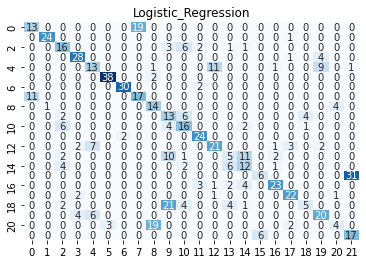

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("Logistic_Regression")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [33]:
from sklearn import metrics
print(score_lr=round(metrics.accuracy_score(y_test,Y_pred_lr)*100,2))
print(score_lr_precision=metrics.precision_score(Y_pred_lr,y_test,average='macro'))
print(score_lr_recall=round(metrics.recall_score(y_test,Y_pred_lr,average='macro')*100,2))
print(score_lr_f1_score=round(metrics.f1_score(y_test, Y_pred_lr,average='macro')*100,2))

In [34]:
import pickle
with open('model_MPH_LR_newest.sav','wb') as f:
    pickle.dump(lr,f)

# SVM Linear 

In [35]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 68.03 %


<AxesSubplot:title={'center':'SVM'}>

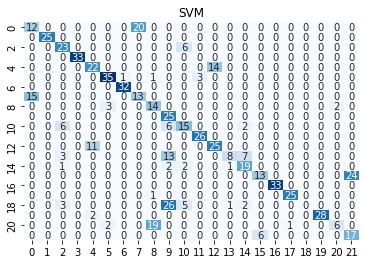

In [36]:
lr_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [37]:
from sklearn import metrics
score_svm=round(metrics.accuracy_score(y_test,Y_pred_svm)*100,2)
score_svm_precision=metrics.precision_score(Y_pred_svm,y_test,average='macro')
score_svm_recall=round(metrics.recall_score(y_test,Y_pred_svm,average='macro')*100,2)
score_svm_f1_score=round(metrics.f1_score(y_test,Y_pred_svm,average='macro')*100,2)

In [38]:
import pickle
with open('model_MPH_SVM_newest.sav','wb') as f:
    pickle.dump(sv,f)

# Naive Bayes 

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)

In [40]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 76.21 %


<AxesSubplot:title={'center':'Naive Bayes'}>

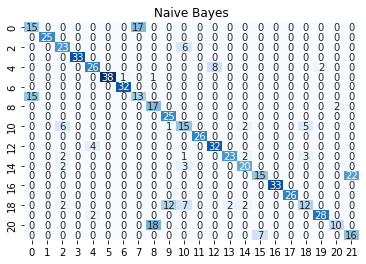

In [41]:
lr_cm=confusion_matrix(y_test,Y_pred_nb)
plt.title("Naive Bayes")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [42]:
from sklearn import metrics
score_nb=round(metrics.accuracy_score(y_test,Y_pred_nb)*100,2)
score_nb_precision=metrics.precision_score(Y_pred_nb,y_test,average='macro')
score_nb_recall=round(metrics.recall_score(y_test,Y_pred_nb,average='macro')*100,2)
score_nb_f1_score=round(metrics.f1_score(y_test,Y_pred_nb,average='macro')*100,2)

In [43]:
import pickle
with open('model_MPH_NB_newest.sav','wb') as f:
    pickle.dump(nb,f)

# Decision Tree

In [44]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 75.45 %


<AxesSubplot:title={'center':'Decision Tree'}>

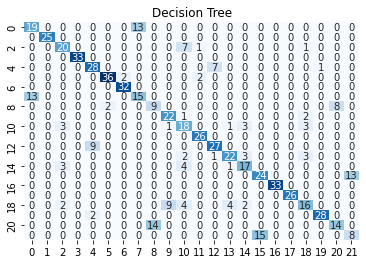

In [45]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Decision Tree")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [46]:
from sklearn import metrics
score_dt=round(metrics.accuracy_score(y_test,Y_pred_dt)*100,2)
score_dt_precision=metrics.precision_score(Y_pred_dt,y_test,average='macro')
score_dt_recall=round(metrics.recall_score(y_test,Y_pred_dt,average='macro')*100,2)
score_dt_f1_score=round(metrics.f1_score(y_test,Y_pred_dt,average='macro')*100,2)

In [47]:
import pickle
with open('model_MPH_DT_newest.sav','wb') as f:
    pickle.dump(dt,f)

# Random Forest

In [48]:
rfc=RandomForestClassifier(n_estimators=10,n_jobs=2,verbose=2)
rfc.fit(x_train,y_train)
score_rf=rfc.score(x_test,y_test)
Y_pred_rf = rfc.predict(x_test)
score_rf=round(accuracy_score(Y_pred_rf,y_test)*100,2)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [49]:
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 75.45 %


<AxesSubplot:title={'center':'Random Forest'}>

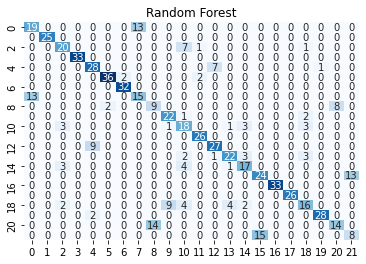

In [50]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Random Forest")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [51]:
from sklearn import metrics
score_rf=round(metrics.accuracy_score(y_test,Y_pred_rf)*100,2)
score_rf_precision=metrics.precision_score(Y_pred_rf,y_test,average='macro')
score_rf_recall=round(metrics.recall_score(y_test,Y_pred_rf,average='macro')*100,2)
score_rf_f1_score=round(metrics.f1_score(y_test,Y_pred_rf,average='macro')*100,2)

In [52]:
import pickle
with open('model_MPH_RF_newest.sav','wb') as f:
    pickle.dump(rfc,f)

# ADA Boost

In [53]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)
ada.fit(x_train, y_train)

ada.score(x_test,y_test)
predictions = ada.predict(x_test)

In [54]:
score_ada = round(accuracy_score(predictions,y_test)*100,2)

print("The accuracy score achieved using Ada Boost is: "+str(score_ada)+" %")

The accuracy score achieved using Ada Boost is: 75.91 %


<AxesSubplot:title={'center':'ADA Boost'}>

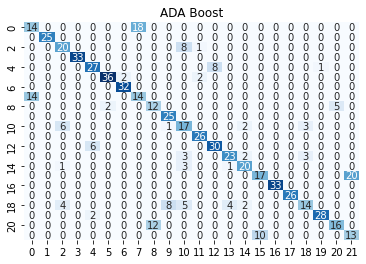

In [55]:
lr_cm=confusion_matrix(y_test,predictions)
plt.title("ADA Boost")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [56]:
from sklearn import metrics
score_ada=round(metrics.accuracy_score(y_test,predictions)*100,2)
score_ada_precision=metrics.precision_score(predictions,y_test,average='macro')
score_ada_recall=round(metrics.recall_score(y_test,predictions,average='macro')*100,2)
score_ada_f1_score=round(metrics.f1_score(y_test,predictions,average='macro')*100,2)

In [57]:
import pickle
with open('model_MPH_ADA_newest.sav','wb') as f:
    pickle.dump(ada,f)

# Neural Network

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [59]:
import tensorflow as tf
from tensorflow import keras
model=tf.keras.Sequential([
    keras.layers.Dense(20,input_shape=x_train.shape[1:],activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(22,activation='sigmoid'),
])

In [60]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
49/49 [==============================] - 0s 2ms/step - loss: 4.9886 - accuracy: 0.0883
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 3.7858 - accuracy: 0.0916
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 2.8743 - accuracy: 0.0461
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 2.5273 - accuracy: 0.0403
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 2.3921 - accuracy: 0.0422
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: 2.2870 - accuracy: 0.0481
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 2.2049 - accuracy: 0.0532
Epoch 8/100
49/49 [==============================] - 0s 3ms/step - loss: 2.1478 - accuracy: 0.0656
Epoch 9/100
49/49 [==============================] - 0s 2ms/step - loss: 2.1098 - accuracy: 0.0643
Epoch 10/100
49/49 [==============================] - 0s 2ms/step - loss: 2.0828 - accuracy: 0.0714
Epoch 11/

In [62]:
model.evaluate(x_test,y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.8188 - accuracy: 0.5727


[0.8188092112541199, 0.5727272629737854]

In [63]:
pred=model.predict(x_test)

In [65]:
pred=np.argmax(pred, axis=1)

In [66]:
a=model.evaluate(x_test,y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.8188 - accuracy: 0.5727


In [67]:
a[1]

0.5727272629737854

In [68]:
scores = [score_lr_precision,score_svm_precision,score_nb_precision,score_dt_precision,score_rf_precision,score_ada_precision]
algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","Decision Tree","Random Forest","Ada Boost"]    


for i in range(len(algorithms)):
    print("The Precision achieved using "+algorithms[i]+" is: "+str(scores[i]))

The Precision achieved using Logistic Regression is: 0.5894343118901002
The Precision achieved using Support Vector Machine is: 0.6947605460959607
The Precision achieved using Naive Bayes is: 0.7707737305944647
The Precision achieved using Decision Tree is: 0.7487813191968347
The Precision achieved using Random Forest is: 0.7593487793002286
The Precision achieved using Ada Boost is: 0.7626375894291969


C:\Users\abc\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


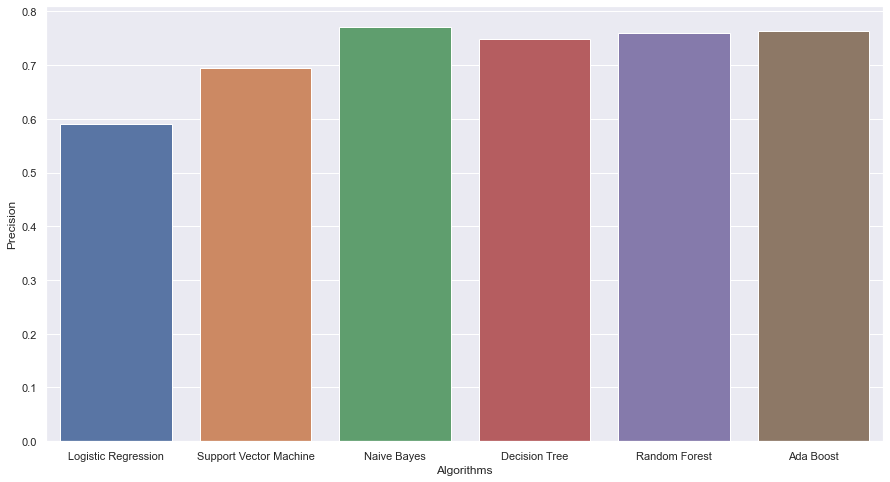

In [69]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Precision")

sns.barplot(algorithms,scores)
plt.show()

In [70]:
scores = [score_lr_recall,score_svm_recall,score_nb_recall,score_dt_recall,score_rf_recall,score_ada_recall]
algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","Decision Tree","Random Forest","Ada Boost"]    


for i in range(len(algorithms)):
    print("The Recall achieved using "+algorithms[i]+" is: "+str(scores[i]))

The Recall achieved using Logistic Regression is: 58.94
The Recall achieved using Support Vector Machine is: 69.48
The Recall achieved using Naive Bayes is: 77.08
The Recall achieved using Decision Tree is: 74.88
The Recall achieved using Random Forest is: 75.93
The Recall achieved using Ada Boost is: 76.26


C:\Users\abc\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


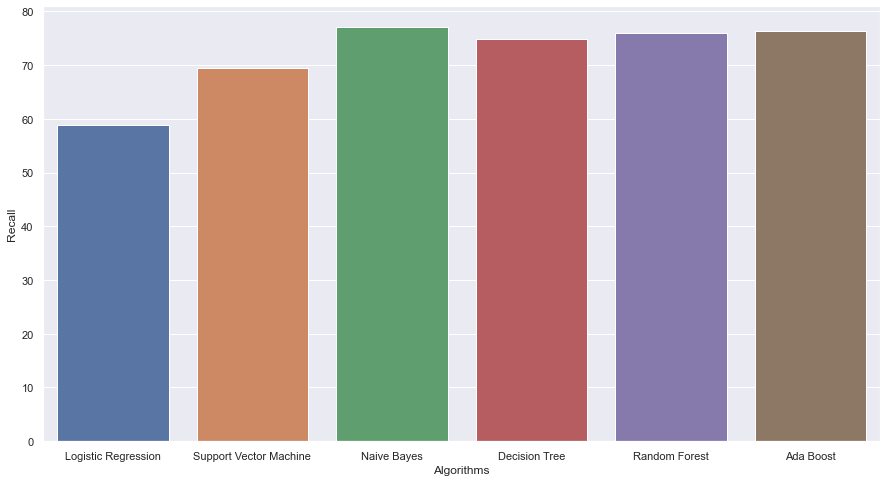

In [71]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Recall")

sns.barplot(algorithms,scores)
plt.show()

In [72]:
scores = [score_lr_f1_score,score_svm_f1_score,score_nb_f1_score,score_dt_f1_score,score_rf_f1_score,score_ada_f1_score]
algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","Decision Tree","Random Forest","Ada Boost"]    


for i in range(len(algorithms)):
    print("The F1 Score achieved using "+algorithms[i]+" is: "+str(scores[i]))

The F1 Score achieved using Logistic Regression is: 56.04
The F1 Score achieved using Support Vector Machine is: 66.04
The F1 Score achieved using Naive Bayes is: 75.52
The F1 Score achieved using Decision Tree is: 74.44
The F1 Score achieved using Random Forest is: 74.95
The F1 Score achieved using Ada Boost is: 75.41


C:\Users\abc\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


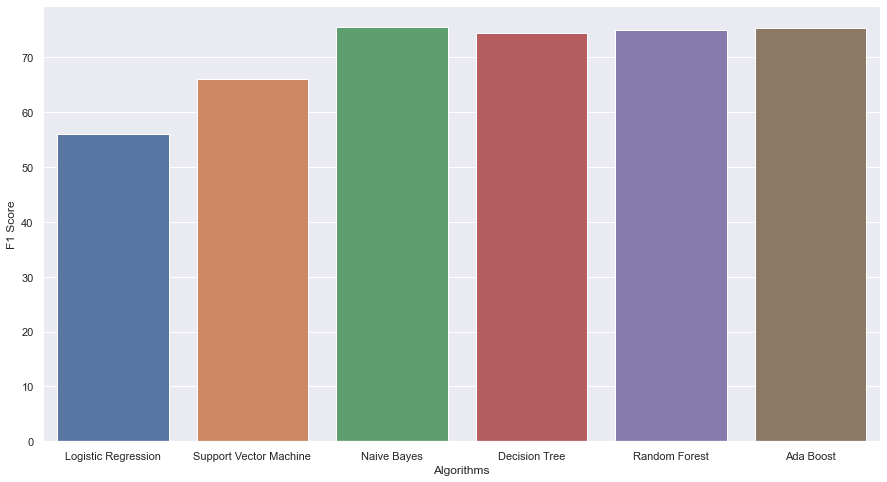

In [73]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")

sns.barplot(algorithms,scores)
plt.show()

In [74]:
scores = [score_lr,score_svm,score_nb,score_dt,score_rf,score_ada]
algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","Decision Tree","Random Forest","Ada Boost"]    


for i in range(len(algorithms)):
    print("The Accuracy Score achieved using "+algorithms[i]+" is: "+str(scores[i]))

The Accuracy Score achieved using Logistic Regression is: 57.73
The Accuracy Score achieved using Support Vector Machine is: 68.03
The Accuracy Score achieved using Naive Bayes is: 76.21
The Accuracy Score achieved using Decision Tree is: 75.45
The Accuracy Score achieved using Random Forest is: 75.45
The Accuracy Score achieved using Ada Boost is: 75.91


C:\Users\abc\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


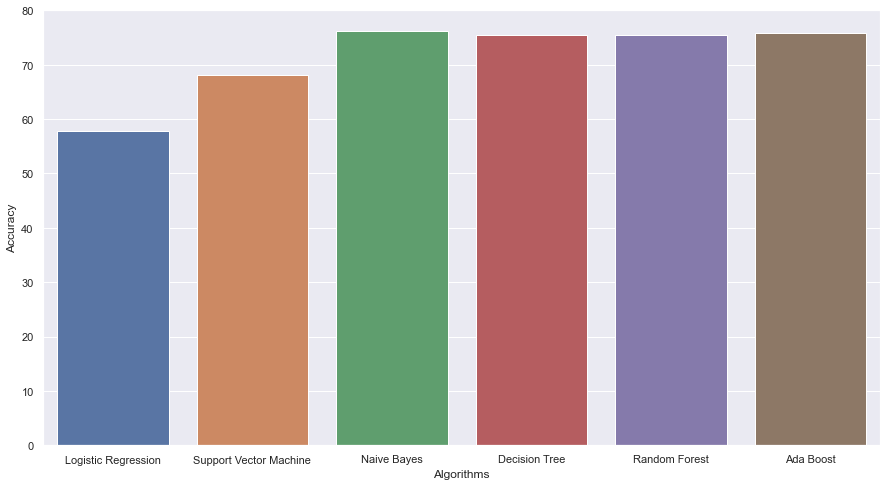

In [75]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")

sns.barplot(algorithms,scores)
plt.show()

In [76]:
dff_new.loc[1023]

N           80.000000
P           71.000000
K           47.000000
ph           6.156373
Moisture    63.000000
label        1.000000
Name: 1023, dtype: float64

In [77]:
pred

array([ 2, 16, 21, 20, 21, 20,  8, 10, 13,  9,  8, 16, 13, 19,  1, 19, 19,
        9,  1,  8, 10, 17,  1,  2,  9,  6, 12, 11,  3,  6, 12,  9, 10,  9,
       19, 16,  8, 12, 17, 14,  8, 17, 16, 21,  9, 12,  4,  1,  1, 21, 21,
       14,  3,  6,  6,  9,  3,  2,  9, 10,  3,  6,  5,  3, 20,  3,  3,  4,
       10,  3, 12,  5, 19,  1, 11, 16,  9,  5, 10,  9, 15, 21, 17,  5, 14,
        4,  3,  5,  3,  3, 12,  3,  3, 21, 14,  2, 20,  5, 15,  9, 14,  9,
        3, 16, 12,  2, 14, 16, 15, 16,  1, 11,  2,  5,  5,  2, 13, 12,  1,
       20,  8, 16,  3,  3, 14, 19, 14, 20, 15, 15,  9, 21, 11,  3, 14,  3,
        1,  3, 12, 10,  3, 16,  6,  9,  9, 19, 14,  9, 16,  5, 19, 17,  9,
       16, 11, 19, 15,  3,  3, 11, 11, 14,  9,  5, 17, 14,  3, 21, 21, 10,
        3, 21, 15, 19, 19,  8,  3, 14,  1, 19,  3,  9,  5, 14, 17, 11, 15,
        0, 21, 11, 13, 19, 12,  3,  8,  4,  4, 16, 10, 19,  1,  3, 16, 20,
       14,  3,  9,  3,  9,  6, 17,  3,  5, 11, 17, 17,  2,  1, 21, 12, 10,
       21, 21, 21,  5, 12

In [79]:
model.save('Neural_Networks_MPH.hp5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Neural_Networks_MPH.hp5\assets


In [80]:
import pandas as pd
dict = {
        'Moisture':float(input("Enter Moisture:")),
        'Ph value':float(input("Enter Ph-Value:"))}
dff=pd.DataFrame(dict,index=[0])

Enter Moisture:38
Enter Ph-Value:2


In [81]:
with open('model_nitrogen_moisture_ph_ada.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict(dff)
nitrogen=led[0]
print("Nitrogen is ",nitrogen)
import pickle
with open('model_Potassium_moisture_ph_ada.sav','rb') as f:
    ss=pickle.load(f)
d=ss.predict(dff)
potassium=d[0]
print("Potassium is",potassium)
with open('model_Phosphorous_moisture_ph_ada.sav','rb') as f:
    st=pickle.load(f)
ed=st.predict(dff)
phosphorous=ed[0]
print("Phosphorous is",phosphorous)

C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Nitrogen is  37
Potassium is 0
Phosphorous is 0


In [82]:
with open('model_MPH_LR_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By Logidtic Regression ",le.inverse_transform([int(lr_output)]))

Recommended Crop By Logidtic Regression  ['coffee']


C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [83]:
with open('model_MPH_NB_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By Naive Bayes ",le.inverse_transform([int(lr_output)]))

Recommended Crop By Naive Bayes  ['mothbeans']


C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [84]:
with open('model_MPH_DT_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By Decision Tree ",le.inverse_transform([int(lr_output)]))

Recommended Crop By Decision Tree  ['orange']


C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [85]:
with open('model_MPH_SVM_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By SVM ",le.inverse_transform([int(lr_output)]))

Recommended Crop By SVM  ['orange']


C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [86]:
with open('model_MPH_RF_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By RF ",le.inverse_transform([int(lr_output)]))

Recommended Crop By RF  ['orange']


C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [87]:
with open('model_MPH_ADA_newest.sav','rb') as f:
    ts=pickle.load(f)
led=ts.predict([[nitrogen,phosphorous,potassium,list(dff.loc[0])[0],list(dff.loc[0])[1]]])
lr_output=led[0]
print("Recommended Crop By ADA ",le.inverse_transform([int(lr_output)]))

Recommended Crop By ADA  ['orange']


C:\Users\abc\anaconda3\envs\project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [88]:
import tensorflow
filename='Neural_Networks_MPH.hp5'
loaded_model_nn = tensorflow.keras.models.load_model(filename)
rf=loaded_model_nn.predict([[int(nitrogen),int(phosphorous),int(potassium),int(list(dff.loc[0])[0]),int(list(dff.loc[0])[1])]])
print("Recommended Crop By NN ",le.inverse_transform([int(lr_output)]))

Recommended Crop By NN  ['orange']
